This Jupyter Notebook describes the second of two experiments shown in Figure 3 and Extended Data 7. It additionally shows Extended Data 8.

The data shown in 3C, 3D, E7C, and E7D represent an experiment which compares DM-Seq to multiple sequencing conditions (no deamination, BS-Seq, TAPS, and TAPS-beta).

The data shown in E8 represent an experiment which compares BS deamination to A3A and borane deamination.

In [1]:
#packages
library(tidyr)
library(dplyr)
library(ggplot2)
library(R.utils)
library(stringr)
library(ggpubr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: R.oo
Loading required package: R.methodsS3
R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.
R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.

Attaching package: ‘R.oo’

The following object is masked from ‘package:R.methodsS3’:

    throw

The following objects are masked from ‘package:methods’:

    getClasses, getMethods

The following objects are masked from ‘package:base’:

    attach, detach, load, save

R.utils v2.11.0 (2021-09-26 08:30:02 UTC) successfully loaded. See ?R.utils for help.

Attaching package: ‘R.utils’

The following object is masked from ‘package:tidyr’:

    extract

The following object is masked from ‘package:utils’:

    timestamp

The following objects are masked fr

In [2]:
#bs-seq
file_bs <- read.csv(file = '100_mGpC_BS.txt', header=FALSE, sep='\t') #deposited to GEO
data_bs = tbl_df(file_bs)

#make data frames with sense and antisense strands, changing the antisense "sense" variable to match the sense strand so the strands are coupled.
data_sense <- data_bs %>% filter (V3=="+") %>% mutate (sense = V2)
data_antisense <- data_bs %>% filter (V3=="-") %>% mutate (sense = V2 - 1)

#bind back and create a string which tells you sequence context in both directions.
data2 <- bind_rows(data_sense,data_antisense) %>% group_by(sense) %>% mutate(both_ends = toString(V7))

#filter back individual strands after generating new row
data_sense <- data2 %>% filter (V3=="+")
data_antisense <- data2 %>% filter (V3=="-")

#make 5' row for just the negative strand.
data_antisense <- data_antisense %>% mutate(opp_minus_one_pos = str_sub(both_ends,3,3))
data_antisense <- data_antisense %>% mutate(minus_one_pos = case_when(opp_minus_one_pos == "C" ~ "G", opp_minus_one_pos == "G" ~ "C", opp_minus_one_pos == "A" ~ "T", opp_minus_one_pos == "T" ~ "A"))

#make 5' row for just the positive strand.
data_sense <- data_sense %>% mutate(opp_minus_one_pos = str_sub(both_ends,-1,-1))
data_sense <- data_sense %>% mutate(minus_one_pos = case_when(opp_minus_one_pos == "C" ~ "G", opp_minus_one_pos == "G" ~ "C", opp_minus_one_pos == "A" ~ "T", opp_minus_one_pos == "T" ~ "A"))

#bind back for final dataset
data_bs <- bind_rows(data_sense,data_antisense) %>% group_by(sense)
data_bs <- data_bs %>% mutate(percent_c = 100*V4/(V4+V5))
data_bs <- data_bs %>% mutate(percent_t = 100*V5/(V4+V5))

#remove nas
data_bs <- na.omit(data_bs)

#filter min cov 5
data_bs <- data_bs %>% mutate(cov = V4 + V5) %>% filter(cov > 4)

Warning message:
“`tbl_df()` was deprecated in dplyr 1.0.0.
Please use `tibble::as_tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”

In [3]:
#dm-seq
file_dm <- read.csv(file = '100_mGpC_DM.txt', header=FALSE, sep='\t') #deposited to GEO
data_dm = tbl_df(file_dm)

#make data frames with sense and antisense strands, changing the antisense "sense" variable to match the sense strand so the strands are coupled.
data_sense <- data_dm %>% filter (V3=="+") %>% mutate (sense = V2)
data_antisense <- data_dm %>% filter (V3=="-") %>% mutate (sense = V2 - 1)

#bind back and create a string which tells you sequence context in both directions.
data2 <- bind_rows(data_sense,data_antisense) %>% group_by(sense) %>% mutate(both_ends = toString(V7))

#filter back individual strands after generating new row
data_sense <- data2 %>% filter (V3=="+")
data_antisense <- data2 %>% filter (V3=="-")

#make 5' row for just the negative strand.
data_antisense <- data_antisense %>% mutate(opp_minus_one_pos = str_sub(both_ends,3,3))
data_antisense <- data_antisense %>% mutate(minus_one_pos = case_when(opp_minus_one_pos == "C" ~ "G", opp_minus_one_pos == "G" ~ "C", opp_minus_one_pos == "A" ~ "T", opp_minus_one_pos == "T" ~ "A"))

#make 5' row for just the positive strand.
data_sense <- data_sense %>% mutate(opp_minus_one_pos = str_sub(both_ends,-1,-1))
data_sense <- data_sense %>% mutate(minus_one_pos = case_when(opp_minus_one_pos == "C" ~ "G", opp_minus_one_pos == "G" ~ "C", opp_minus_one_pos == "A" ~ "T", opp_minus_one_pos == "T" ~ "A"))

#bind back for final dataset
data_dm <- bind_rows(data_sense,data_antisense) %>% group_by(sense)
data_dm <- data_dm %>% mutate(percent_c = 100*V4/(V4+V5))
data_dm <- data_dm %>% mutate(percent_t = 100*V5/(V4+V5))

#remove nas
data_dm <- na.omit(data_dm)

#filter min cov 5
data_dm <- data_dm %>% mutate(cov = V4 + V5) %>% filter(cov > 4)

In [4]:
#TAPS
file_t <- read.csv(file = '100_mGpC_TAPS.txt', header=FALSE, sep='\t') #deposited to GEO
data_t = tbl_df(file_t)

#make data frames with sense and antisense strands, changing the antisense "sense" variable to match the sense strand so the strands are coupled.
data_sense <- data_t %>% filter (V3=="+") %>% mutate (sense = V2)
data_antisense <- data_t %>% filter (V3=="-") %>% mutate (sense = V2 - 1)

#bind back and create a string which tells you sequence context in both directions.
data2 <- bind_rows(data_sense,data_antisense) %>% group_by(sense) %>% mutate(both_ends = toString(V7))

#filter back individual strands after generating new row
data_sense <- data2 %>% filter (V3=="+")
data_antisense <- data2 %>% filter (V3=="-")

#make 5' row for just the negative strand.
data_antisense <- data_antisense %>% mutate(opp_minus_one_pos = str_sub(both_ends,3,3))
data_antisense <- data_antisense %>% mutate(minus_one_pos = case_when(opp_minus_one_pos == "C" ~ "G", opp_minus_one_pos == "G" ~ "C", opp_minus_one_pos == "A" ~ "T", opp_minus_one_pos == "T" ~ "A"))

#make 5' row for just the positive strand.
data_sense <- data_sense %>% mutate(opp_minus_one_pos = str_sub(both_ends,-1,-1))
data_sense <- data_sense %>% mutate(minus_one_pos = case_when(opp_minus_one_pos == "C" ~ "G", opp_minus_one_pos == "G" ~ "C", opp_minus_one_pos == "A" ~ "T", opp_minus_one_pos == "T" ~ "A"))

#bind back for final dataset
data_t <- bind_rows(data_sense,data_antisense) %>% group_by(sense)
data_t <- data_t %>% mutate(percent_c = 100*V4/(V4+V5))
data_t <- data_t %>% mutate(percent_t = 100*V5/(V4+V5))

#remove nas
data_t <- na.omit(data_t)

#filter min cov 5
data_t <- data_t %>% mutate(cov = V4 + V5) %>% filter(cov > 4)

In [5]:
#TAPS-beta
file_tb <- read.csv(file = '100_mGpC_TAPSb.txt', header=FALSE, sep='\t') #deposited to GEO
data_tb = tbl_df(file_tb)

#make data frames with sense and antisense strands, changing the antisense "sense" variable to match the sense strand so the strands are coupled.
data_sense <- data_tb %>% filter (V3=="+") %>% mutate (sense = V2)
data_antisense <- data_tb %>% filter (V3=="-") %>% mutate (sense = V2 - 1)

#bind back and create a string which tells you sequence context in both directions.
data2 <- bind_rows(data_sense,data_antisense) %>% group_by(sense) %>% mutate(both_ends = toString(V7))

#filter back individual strands after generating new row
data_sense <- data2 %>% filter (V3=="+")
data_antisense <- data2 %>% filter (V3=="-")

#make 5' row for just the negative strand.
data_antisense <- data_antisense %>% mutate(opp_minus_one_pos = str_sub(both_ends,3,3))
data_antisense <- data_antisense %>% mutate(minus_one_pos = case_when(opp_minus_one_pos == "C" ~ "G", opp_minus_one_pos == "G" ~ "C", opp_minus_one_pos == "A" ~ "T", opp_minus_one_pos == "T" ~ "A"))

#make 5' row for just the positive strand.
data_sense <- data_sense %>% mutate(opp_minus_one_pos = str_sub(both_ends,-1,-1))
data_sense <- data_sense %>% mutate(minus_one_pos = case_when(opp_minus_one_pos == "C" ~ "G", opp_minus_one_pos == "G" ~ "C", opp_minus_one_pos == "A" ~ "T", opp_minus_one_pos == "T" ~ "A"))

#bind back for final dataset
data_tb <- bind_rows(data_sense,data_antisense) %>% group_by(sense)
data_tb <- data_tb %>% mutate(percent_c = 100*V4/(V4+V5))
data_tb <- data_tb %>% mutate(percent_t = 100*V5/(V4+V5))

#remove nas
data_tb <- na.omit(data_tb)

#filter min cov 5
data_tb <- data_tb %>% mutate(cov = V4 + V5) %>% filter(cov > 4)

In [6]:
#join all experiments together
data <- inner_join (data_bs,data_dm, by = c("V2"))
data <- inner_join (data,data_t, by = c("V2"))
data <- inner_join (data,data_tb, by = c("V2"))

In [7]:
#calculate percent MODIFICATION for each method

data <- data %>% mutate (BS = percent_c.x)
data <- data %>% mutate (DM = 100 - percent_c.y)
data <- data %>% mutate (TAPS = 100 - percent_c.x.x)
data <- data %>% mutate (TAPSb = 100 - percent_c.y.y)

In [8]:
#calculate the normalized difference between BS and method

data <- data %>% mutate (normalized_DM = (BS - DM) / (BS + DM))
data <- data %>% mutate (normalized_TAPS = (BS - TAPS) / (BS + TAPS))
data <- data %>% mutate (normalized_TAPSb = (BS - TAPSb) / (BS + TAPSb))

data <- data %>% mutate (normalized_DM_pos = case_when(normalized_DM >0 & normalized_DM != 1 ~"> zero", normalized_DM == 0 ~"zero", normalized_DM <0 & normalized_DM != -1 ~"< zero",TRUE ~ NA_character_))
data <- data %>% mutate (normalized_TAPS_pos = case_when(normalized_TAPS >0 & normalized_TAPS != 1~"> zero", normalized_TAPS == 0 ~"zero", normalized_TAPS <0 & normalized_TAPS != -1~"< zero", TRUE ~ NA_character_))
data <- data %>% mutate (normalized_TAPSb_pos = case_when(normalized_TAPSb >0 & normalized_TAPSb != 1~"> zero", normalized_TAPSb == 0 ~"zero", normalized_TAPSb <0 & normalized_TAPSb != -1~"< zero", TRUE ~ NA_character_))


In [9]:
#gather in correct format
data_select <- data %>% select(V2, minus_one_pos.x, BS, DM, TAPS, TAPSb)
data_gather <- gather(data_select,"V2","percent_mod", 3:6)

# Extended Data Figure 7C

Warning message:
“`show_guide` has been deprecated. Please use `show.legend` instead.”

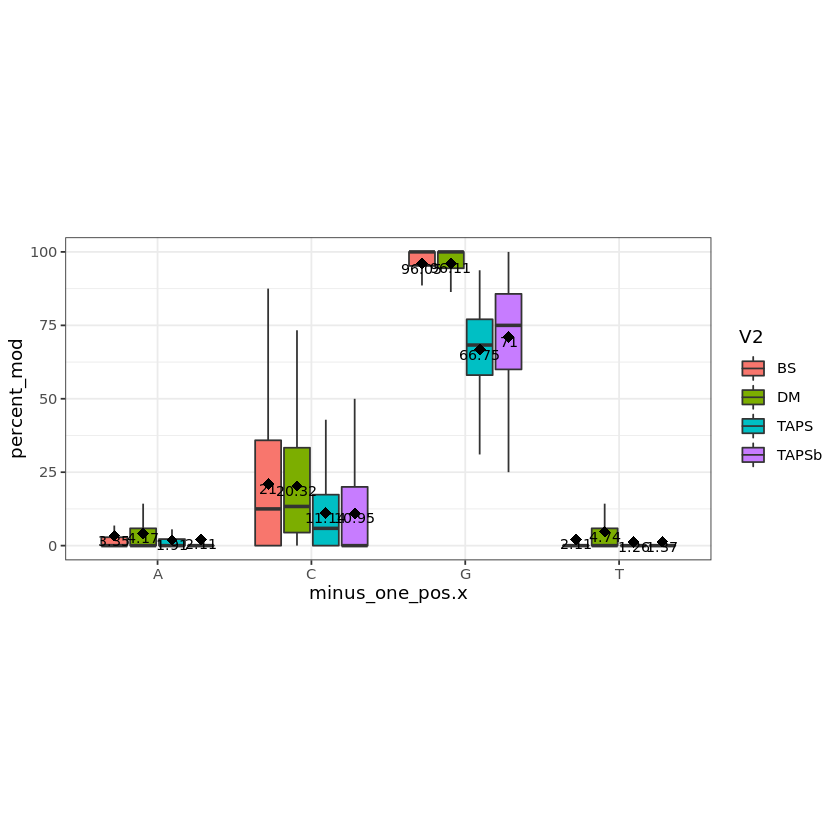

In [10]:
#plot GpC methylated data as detected by each method
p <- ggplot(data_gather, aes(x=minus_one_pos.x, y=percent_mod, fill = V2)) + geom_boxplot(outlier.shape = NA) + stat_summary(fun=mean, position = position_dodge(width = 0.75), colour="black", geom="text", show_guide = FALSE, 
                                                                                                                                             vjust=1, size = 3, aes( label=round(..y.., digits=2))) + stat_summary(fun=mean, position = position_dodge(width = 0.75), colour="black", geom="point", 
                                                                                                                                                                                                                   shape=18, size=3, show.legend=FALSE) + theme_bw() + theme(aspect.ratio = 0.5)
p

Extended Data Figure 7D reports percent methylation as determined from lambda phage genome Bismark splitting_reports. (After alignment, the BS-Seq, TAPS, and TAPSb data are deduplicated with Picard while DM-Seq is deduplicated and filtered for reads containing 3 consecutive non-conversions). Data has been deposited to GEO as aligned, but not deduplicated or filtered .bam files in order to preserve the read level information presented in Figure 3C (below)

# Figure 3D

In [11]:
#create correlation plots

a <- ggplot(data, aes(x=BS, y=100-DM, alpha = cov.x)) + geom_point() + xlim(0,100) + ylim(0,100)  + theme_bw() + theme(aspect.ratio = 1, legend.position="none") 

b <- ggplot(data, aes(x=BS, y=100-TAPS, alpha = cov.x)) + geom_point() + xlim(0,100) + ylim(0,100)  + theme_bw() + theme(aspect.ratio = 1, legend.position="none")

c <- ggplot(data, aes(x=BS, y=100-TAPSb, alpha = cov.x)) + geom_point() + xlim(0,100) + ylim(0,100)  + theme_bw() + theme(aspect.ratio = 1, legend.position="none")

p <- ggplot(data, aes(x=normalized_DM_pos)) + geom_bar() + geom_text(stat='count', aes(label=..count..), vjust=-1)+ ylim(0,1100)

q <- ggplot(data, aes(x=normalized_TAPS_pos)) + geom_bar() + geom_text(stat='count', aes(label=..count..), vjust=-1) + ylim(0,1100)

r <- ggplot(data, aes(x=normalized_TAPSb_pos)) + geom_bar() + geom_text(stat='count', aes(label=..count..), vjust=-1) + ylim(0,1100)



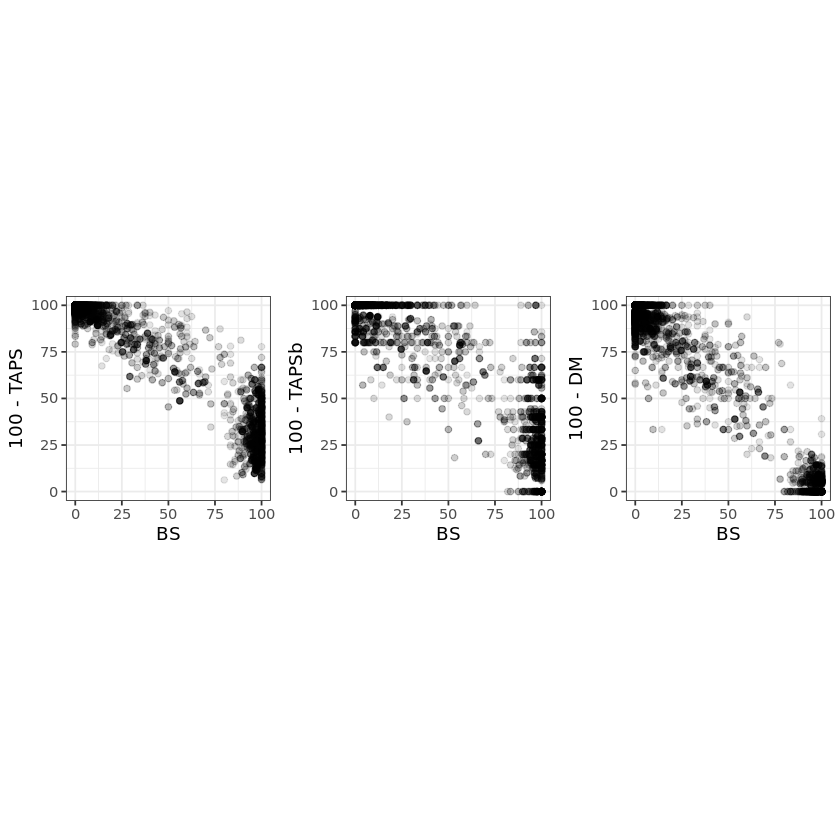

In [12]:
#plot all
all_corr <- ggarrange(b, c, a, ncol = 3, nrow = 1, align = "v")
all_corr

In [13]:
#correlate the deamination methods
c <- cor(data$BS,100-data$DM,method='pearson')
c

c <- cor(data$BS,100-data$TAPS,method='pearson')
c

c <- cor(data$BS,100-data$TAPSb,method='pearson')
c

[1] -0.9759123

[1] -0.9546193

[1] -0.9194838

Warning message:
“Removed 1 rows containing missing values (geom_bar).”Warning message:
“Removed 1 rows containing missing values (geom_text).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”Warning message:
“Removed 1 rows containing missing values (geom_text).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”Warning message:
“Removed 1 rows containing missing values (geom_text).”

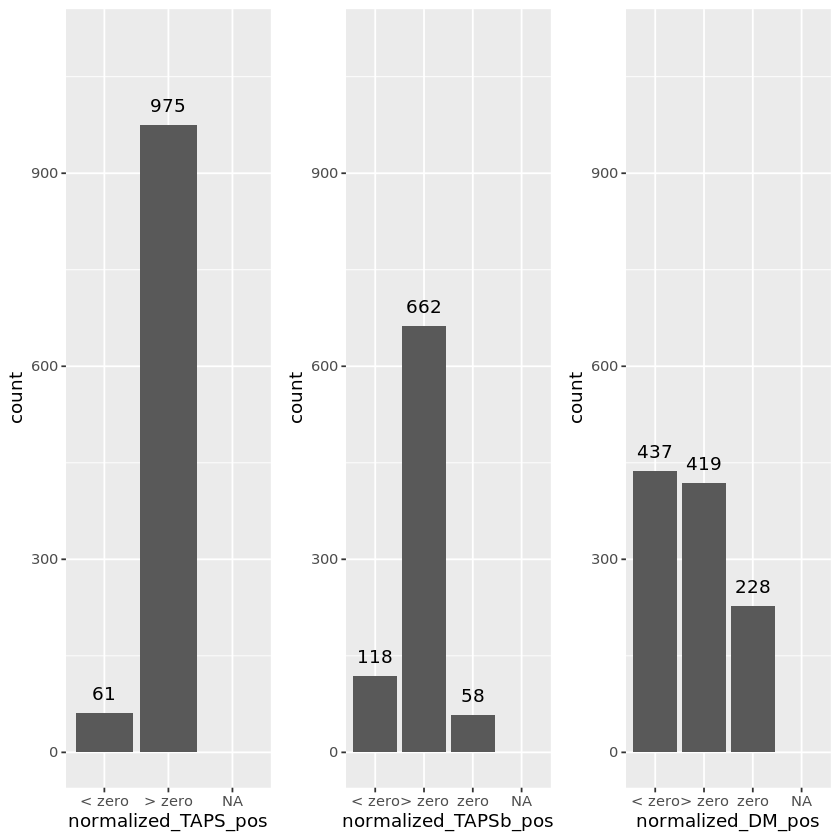

In [14]:
#calculate number of CpGs underestimated or overestimated relative to BS-Seq
all_count <- ggarrange(q, r, p, ncol = 3, nrow = 1, align = "v")
all_count

# Figure 3C

Samtools was used to parse each .bam file by individual genomes (pUC19, lambda, and T4). bismark_methylation_extractor was then used to extract splitting_reports which report the number of reads mapped to each genome. These data are also summarised in Supplementary Data File 1. The number of reads mapping to each genome was then expressed as a percentage of total reads (reads mapping to one spike-in) / (reads mapping to all three spike ins). This simplified Figure_3C.csv file provided here was used to generate stacked bar graphs presented in 3C.

In [15]:
#read file and create dataframe
file <- read.csv(file = 'Figure_3C.csv', header=TRUE, sep=',')
data = tbl_df(file)

In [16]:
#gather data to correct format
data_gather <- data %>% gather ("method", "value", 1:5)
data_gather <- data_gather %>% unite (method_percent, c("method", "Percent"))

In [17]:
#sort
data_gather$method_percent <- factor (data_gather$method_percent, levels = c("none_0","none_50","none_100","BS_0","BS_50","BS_100","TAPS_0","TAPS_50","TAPS_100","TAPSb_0","TAPSb_50","TAPSb_100","DM_0","DM_50","DM_100"))
data_gather$Genome <- factor (data_gather$Genome, levels = c("pUC19","mLambda","T4-hmC"))
data_gather <- data_gather %>% filter (method_percent != "NA")


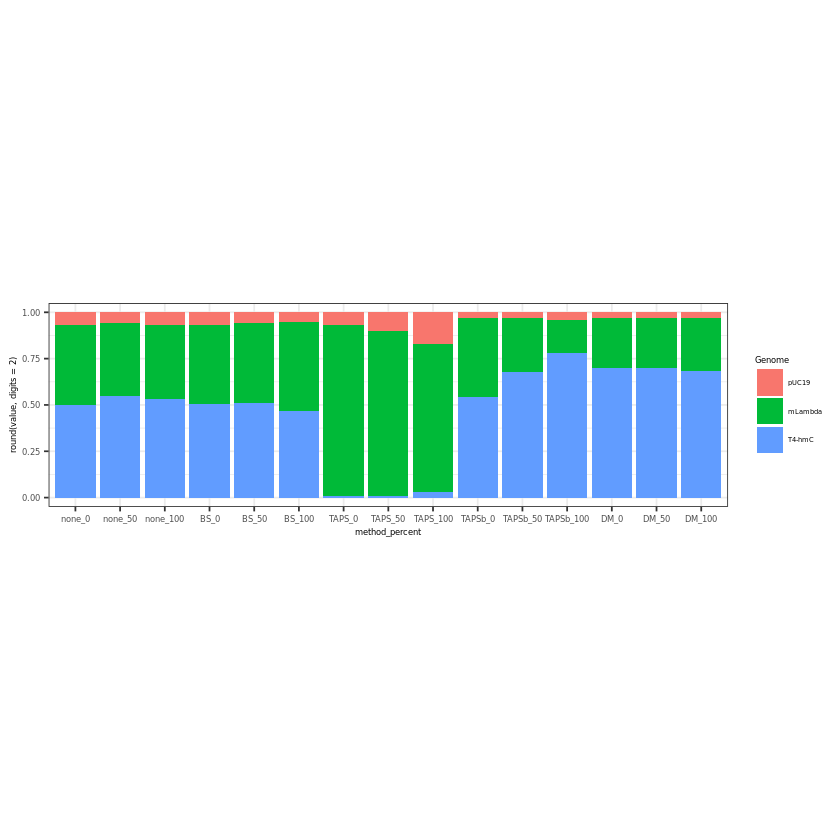

In [18]:
#plot
p <- ggplot(data_gather, aes(fill = Genome, x = method_percent, y = round(value, digits = 2))) + geom_bar(position="fill", stat="identity") + theme_bw() + theme(aspect.ratio = 0.3, axis.text = element_text(size = 5), text = element_text(size = 5)) + ylim(0,1)
p

# Extended Data Figure 8

This was an independent experiment, closely related to the above experiment. This experiment was designed to investigate whether read bias observed in TAPS/TAPS-beta was TET dependent. Additionally, it compared the deamination methods BS, borane, and A3A directly, without interference from any added steps involved in TAPS-beta or DM-Seq.

Reads were extracted and summarized in the same fashion as Figure 3C.

In [19]:
#read file and create dataframe
file <- read.csv(file = 'Figure_E8.csv', header=TRUE, sep=',')
data = tbl_df(file)

In [20]:
#gather data to correct format
data_gather <- data %>% gather ("method", "value", 1:4)
data_gather <- data_gather %>% unite (method_percent, c("method", "Rounds"))

In [21]:
#sort
data_gather$method_percent <- factor (data_gather$method_percent, levels = c("none_0","none_2","BS_0","BS_2","Borane_0","Borane_2","A3A_0","A3A_2"))
data_gather$Genome <- factor (data_gather$Genome, levels = c("pUC19","mLambda","T4-hmC"))

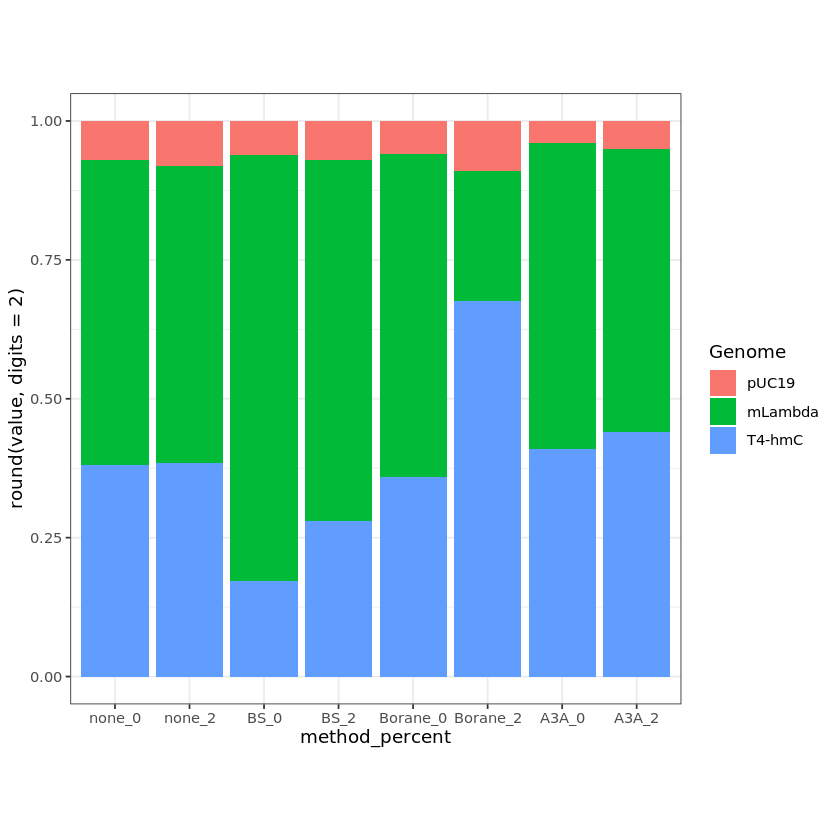

In [22]:
#plot
p <- ggplot(data_gather, aes(fill = Genome, x = method_percent, y = round(value, digits = 2))) + geom_bar(position="fill", stat="identity") + theme_bw() + theme(aspect.ratio = 1) + ylim(0,1)
p 